In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn shap


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


First 5 rows:
    CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Summary Statistics:


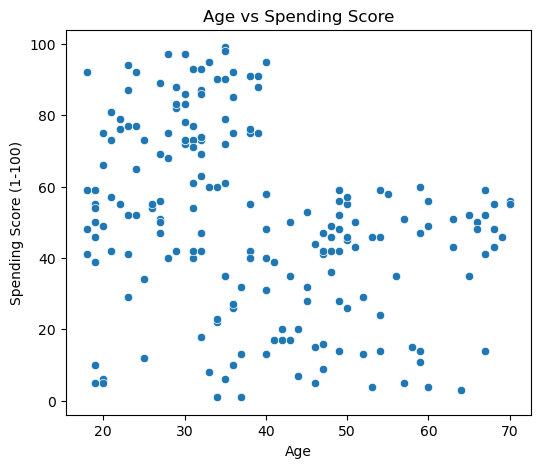

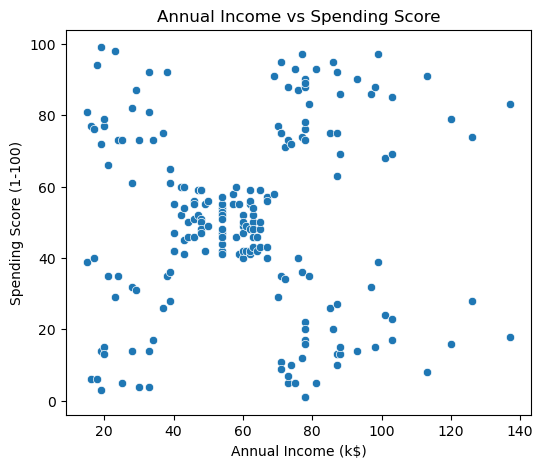

C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

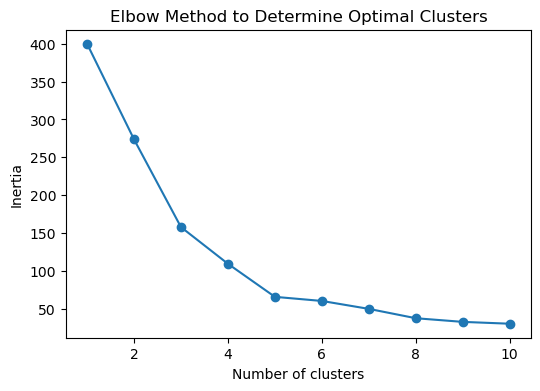

C:\Users\ABC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


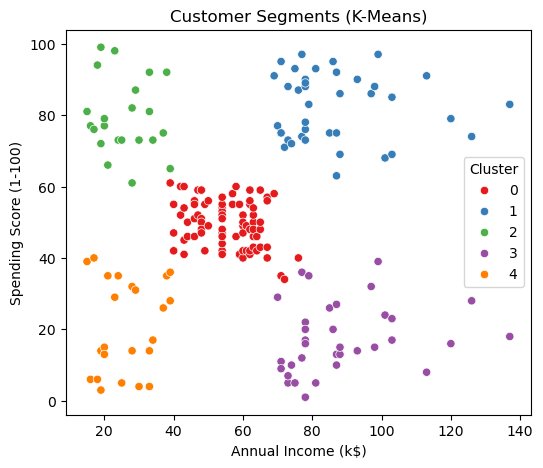

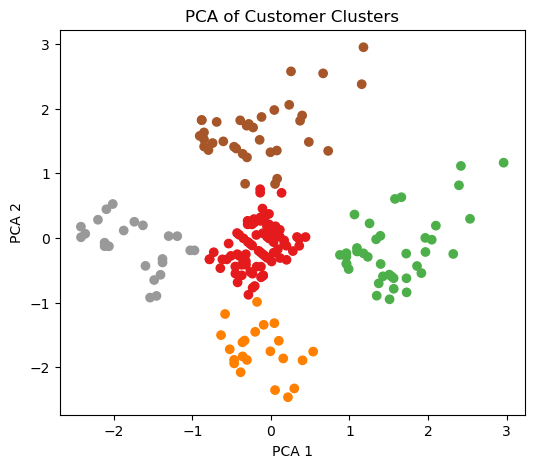


Marketing Strategy Suggestions by Cluster:
Cluster 0: High Income, High Spending - Offer VIP loyalty programs and premium services
Cluster 1: High Income, Low Spending - Provide premium discounts and targeted offers
Cluster 2: Low Income, High Spending - Encourage loyalty programs and rewards
Cluster 3: Low Income, Low Spending - Focus on budget-friendly promotions
Cluster 4: Average Income & Spending - Personalized marketing campaigns


In [6]:
# =========================
# Task 2: Customer Segmentation Using K-Means
# =========================

# -------------------------
# 1️⃣ Import Libraries
# -------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# -------------------------
# 2️⃣ Load Dataset
# -------------------------
df = pd.read_csv("Mall_Customers.csv")
print("First 5 rows:\n", df.head())

# -------------------------
# 3️⃣ Exploratory Data Analysis (EDA)
# -------------------------
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Visualize Age vs Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)
plt.title("Age vs Spending Score")
plt.show()

# Visualize Annual Income vs Spending Score
plt.figure(figsize=(6,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

# -------------------------
# 4️⃣ Feature Selection
# -------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# -------------------------
# 5️⃣ Standardize Features
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------
# 6️⃣ Determine Optimal Number of Clusters (Elbow Method)
# -------------------------
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal Clusters")
plt.show()

# -------------------------
# 7️⃣ Apply K-Means Clustering
# -------------------------
optimal_clusters = 5  # from elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# -------------------------
# 8️⃣ Visualize Clusters
# -------------------------
plt.figure(figsize=(6,5))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df
)
plt.title("Customer Segments (K-Means)")
plt.show()

# -------------------------
# 9️⃣ PCA Visualization
# -------------------------
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
plt.scatter(components[:,0], components[:,1], c=df['Cluster'], cmap='Set1')
plt.title("PCA of Customer Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# -------------------------
# 🔟 Marketing Strategy Suggestions
# -------------------------
strategy = {
    0: "High Income, High Spending - Offer VIP loyalty programs and premium services",
    1: "High Income, Low Spending - Provide premium discounts and targeted offers",
    2: "Low Income, High Spending - Encourage loyalty programs and rewards",
    3: "Low Income, Low Spending - Focus on budget-friendly promotions",
    4: "Average Income & Spending - Personalized marketing campaigns"
}

print("\nMarketing Strategy Suggestions by Cluster:")
for cluster in range(optimal_clusters):
    print(f"Cluster {cluster}: {strategy[cluster]}")
